▲リスト7.1：sin関数にノイズを加えたデータ

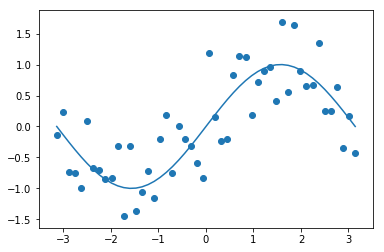

In [163]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi)  # 入力
T = np.sin(X)  # データ
plt.plot(X, T)  # ノイズの付加前

T += 0.4*np.random.randn(len(X))  # 正規分布に従うノイズを加える
plt.scatter(X, T)  # ノイズの付加後

plt.show()

X /= np.pi  # 収束しやすくするため、Xの範囲を-1から1の間に収める

▲リスト7.2：最急降下法による多項式回帰

--- 1次多項式 ---


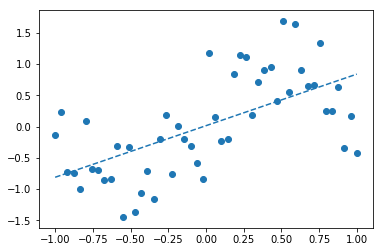

--- 3次多項式 ---


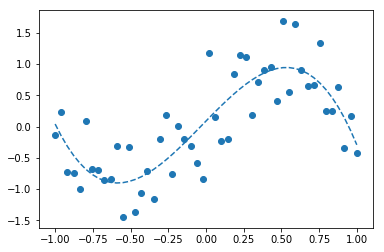

--- 6次多項式 ---


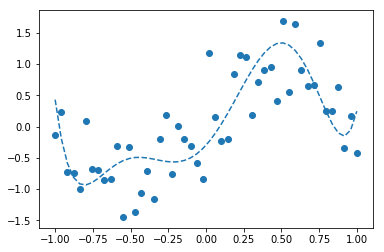

In [167]:
eta = 0.01  # 学習係数

# --- 多項式 ---
def polynomial(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i  # （式 1）
    return poly

# --- 各パラメータの勾配 ---
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):    
        for j in range(len(X)):
            grad_ps[i] += ( polynomial(X[j], params) - T[j] )*X[j]**i  # （式 7）
    return grad_ps

# --- 学習 ---
def fit(X, T, degree, epoch):  # degree: 多項式の次数 epoch: 繰り返し回数
    
    # --- パラメータの初期値を設定 ---
    params = np.random.randn(degree+1)  # パラメータの初期値
    for i in range(len(params)):
        params[i] *= 2**i  # 高次の項ほどパラメータの初期値を大きくする
        
    # --- パラメータの更新 ---
    for i in range(epoch): 
        params -= eta * grad_params(X, T, params)  # （式 4）
        
    return params

# --- 結果の表示 --- 
degrees = [1, 3, 6]  # 多項式の次数
for degree in degrees:
    print("--- " + str(degree) + "次多項式 ---")  # strで文字列に変換
    params = fit(X, T, degree, 1000)
    Y = polynomial(X, params)  # 学習後のパラメータを使用した多項式
    plt.scatter(X, T)
    plt.plot(X, Y, linestyle="dashed")
    plt.show()

#### □問題
　上記の多項式回帰のコードで、多項式の次数を変更して実行してみましょう。

#### □解答例
　自身で想定した結果になっているかどうか確認してみましょう。